In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# load data
url = "../data/gensim_word2vec_trained_with_engineered_features.csv"
df = pd.read_csv(url)

array = df.values

#114 columns for this csv
X = array[:,0:114]
Y = array[:,114]

In [3]:
categorical_columns_df = df.loc[ : , ['emojis_flag', 'emoticons_flag', 'hashtags_flag', 'numbers_flag', 'retweet_flag', 'http_flag'] ]
word_vectors_df = df.iloc[: , 1:101]
feature_engineered_columns_df = df.iloc[:, 107:114]
binary_response_variable_df = df.loc[:, df.columns == 'binary_response_variable']

#combine word_vectors_df with feature_engineered_columns_df, as they are all numerical
#word_vectors_df = word_vectors_df.reset_index()
#feature_engineered_columns_df = feature_engineered_columns_df.reset_index()
word_vec_and_feat_eng_col_df = df.iloc[:, np.r_[1:101,  107:114]]

#add the binary_response _variable to the dfs
word_vec_with_binary_df = pd.concat([word_vectors_df, binary_response_variable_df], axis=1)
feat_eng_col_with_binary_df = pd.concat([feature_engineered_columns_df, binary_response_variable_df], axis=1)
word_vec_and_feat_eng_col_df_with_binary_df = pd.concat([word_vec_and_feat_eng_col_df, binary_response_variable_df], axis=1)

X_categorical_values_array = categorical_columns_df.values
X_word_vectors_array = word_vectors_df.values
X_feature_engineered_columns_array = feature_engineered_columns_df.values
X_word_vec_and_feat_eng_col_array = word_vec_and_feat_eng_col_df.values

In [4]:
word_vec_and_feat_eng_col_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,char_length_original_scaled,char_length_user_scaled,emojis_num_scaled,emoticons_num_scaled,hashtags_num_scaled,numbers_num_scaled,mentions_num_scaled
0,-1.355661,-0.042561,0.086053,0.774145,-0.189370,-0.540282,0.683446,0.373546,0.733408,-0.122014,0.224084,-0.009965,-0.185260,0.246969,0.129447,-0.432170,0.379815,-0.366551,0.735109,0.666798,0.289837,-0.918229,-0.522874,0.210973,0.046207,0.292040,-0.561353,0.846685,-0.094137,-0.078124,-0.215720,-0.424636,-0.251415,0.156246,-0.040707,-0.320695,0.728672,-0.051727,0.746311,-0.440894,0.048988,-0.063088,-0.026718,-0.534357,-0.842976,0.318382,0.043282,0.219640,-0.914849,0.330670,-0.560249,0.300391,1.235994,-0.116884,1.239006,0.329843,0.167357,-0.341978,-0.311091,-0.237891,-0.645969,0.585964,-0.390475,0.500660,-0.727731,-0.585424,0.877145,-0.133109,-0.253205,-0.416642,-0.423333,-0.161288,-0.524837,0.515586,-0.090541,0.413162,-0.079748,0.175161,1.143711,-0.036120,0.226451,0.264419,0.163841,-0.205184,-0.003715,0.470908,-0.365268,0.901096,-0.135031,0.220570,0.785709,0.249187,0.383648,-0.001907,0.088783,-0.707359,0.189690,0.457964,0.169282,0.316829,0.339080,0.327684,0.0,0.0,0.000,0.000000,0.0
1,-0.284385,0.943377,-0.229520,0.361864,-0.114987,-0.568167,0.011825,-0.865694,0.167585,-0.679423,0.413537,-0.202897,0.369425,-0.218345,0.379789,0.371388,0.422255,-0.377097,-0.034203,0.273560,0.934524,0.067896,-0.180705,-0.192155,0.881097,-0.279000,0.339577,-0.335861,-0.264731,0.380141,0.362744,0.001772,1.089290,0.026271,0.091680,-0.133710,-0.274846,-0.535786,0.683284,-0.830092,-0.055001,0.102551,-0.826329,0.684175,-0.748765,-0.076026,-0.319508,0.273689,0.057831,-1.356836,0.253301,-0.241452,0.863390,-0.473078,0.092012,-0.071783,-0.508906,-0.355179,-0.563950,-0.052153,0.164978,0.229433,-0.209093,-0.189783,-0.672645,-0.718425,0.276318,0.303546,-0.622583,0.212298,-0.438984,0.120287,0.084347,0.394192,0.055683,0.042182,0.418796,-0.157400,0.297400,0.029439,-0.071434,-0.308776,-0.109000,-0.297412,-0.442496,1.232406,-0.154964,0.326157,-0.681863,0.146977,0.337165,-0.136783,0.042457,0.020713,0.508822,-0.250096,-0.305061,0.146342,0.082016,0.353863,0.735632,0.723164,0.0,0.0,0.000,0.000000,0.0
2,0.333955,0.431844,-0.714748,0.000060,-0.859465,-0.266616,0.376360,-0.033515,1.021735,-0.918304,0.376360,0.589562,-0.516600,0.277003,0.048827,-0.042766,-0.074889,-0.498474,-0.342897,0.250358,0.704758,-0.423071,-0.071074,0.455958,0.335096,-0.175153,1.170931,0.213465,-0.473322,-0.783201,-0.082716,-0.899943,1.011635,-0.972742,-0.257181,0.169065,-0.650914,0.004331,0.685998,-0.256132,-0.747567,0.844965,0.196315,0.254077,-0.707074,0.640661,-1.105260,0.516902,0.029297,0.042975,-0.447851,0.181428,0.668732,0.384226,0.082190,-0.332072,1.091163,0.641162,1.072874,0.576104,0.053666,-0.163682,0.429044,0.915561,-0.659633,0.124438,0.266659,-0.824714,0.137627,0.432254,0.913684,0.465603,-0.059313,0.257403,0.252530,-0.225449,0.081755,-0.060885,-0.501363,0.064288,-1.595184,0.053446,-0.543937,-0.720648,0.498588,-0.096472,-0.243371,0.252254,-1.178459,-0.474078,0.377185,-0.483392,-0.928809,0.003644,0.561345,0.420580,-0.916567,-0.298223,0.702833,0.386921,0.729885,0.497175,0.0,0.0,0.000,0.285714,0.4
3,-0.962707,-0.476399,0.067396,0.785690,-0.455217,-0.669220,-0.086158,0.324663,0.796208,-0.120873,0.306946,-0.166358,-0.682879,-0.195574,0.109940,-0.727163,0.504173,-0.670152,1.277419,1.052938,0.688950,-1.140773,-0.574695,0.282397,-0.125564,0.034619,-1.477174,-0.033652,-0.821959,0.076526,-1.012457,-0.511615,1.358693,0.133851,-0.773494,-1.104017,-0.864152,0.197951,-0.274255,-0.405367,-0.136201,-0.547879,-0.360925,0.202290,-1.148954,0.459265,-0.395978,0.886106,-0.681510,0.152418,-0.795296,0.595952,1.161317,-1.068835,1.495584,0.107823,0.936489,-1.226143,-0.380023,0.277282

## Spearman correlation for word vecs

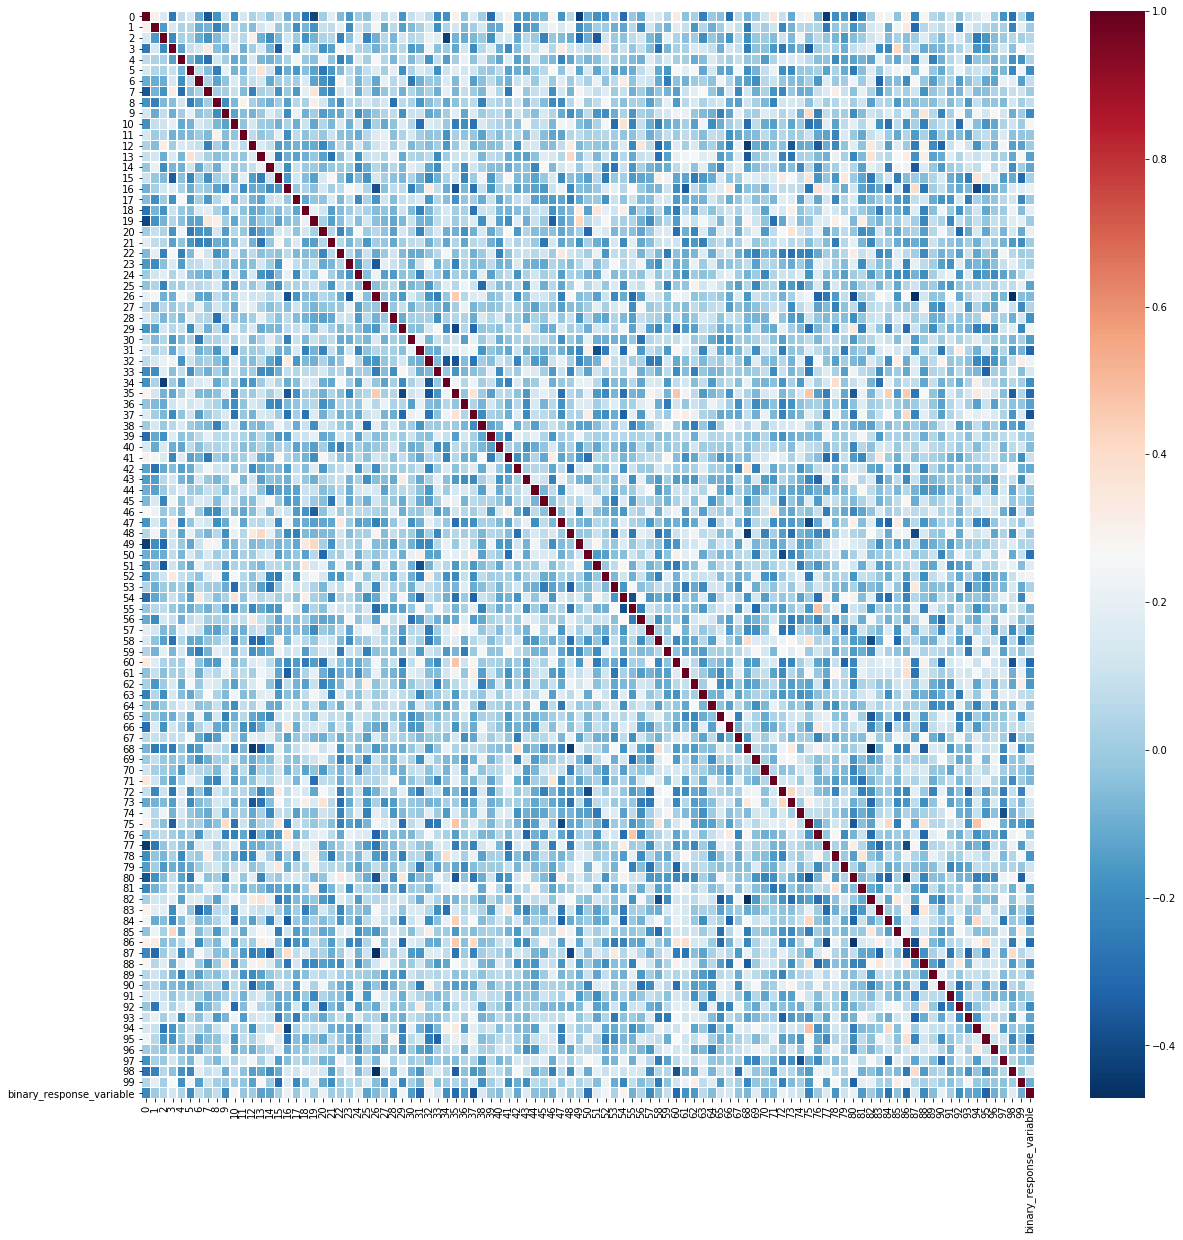

In [5]:
#Using Spearman Correlation, as it is non-parametric
#Spearman correlation works well with 

plt.figure(figsize=(20,20))
spearman_corr = word_vec_with_binary_df.corr(method='spearman')
#sns.heatmap(pearson_corr, annot=True, cmap=plt.cm.Reds)
#plt.show()

sns.heatmap(spearman_corr, 
            xticklabels=spearman_corr.columns,
            yticklabels=spearman_corr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [6]:
#Correlation with output variable
cor_target = abs(spearman_corr["binary_response_variable"])
#cor_target
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features_sort_descending = relevant_features.sort_values(ascending=False)

In [7]:
relevant_features_sort_descending = relevant_features_sort_descending.drop(labels=['binary_response_variable'])
relevant_features_sort_descending

37    0.369058
95    0.331563
31    0.321229
35    0.308781
60    0.306339
        ...   
82    0.004512
21    0.003872
19    0.003496
7     0.003131
1     0.001084
Name: binary_response_variable, Length: 100, dtype: float64

Big oof, the mean of Spearman correlation coefficients is around 0.13, not very high at all. 

In [8]:
relevant_features_sort_descending.describe()

count    100.000000
mean       0.128981
std        0.090647
min        0.001084
25%        0.053713
50%        0.130403
75%        0.190526
max        0.369058
Name: binary_response_variable, dtype: float64

## Spearman correlation for feature engineered columns

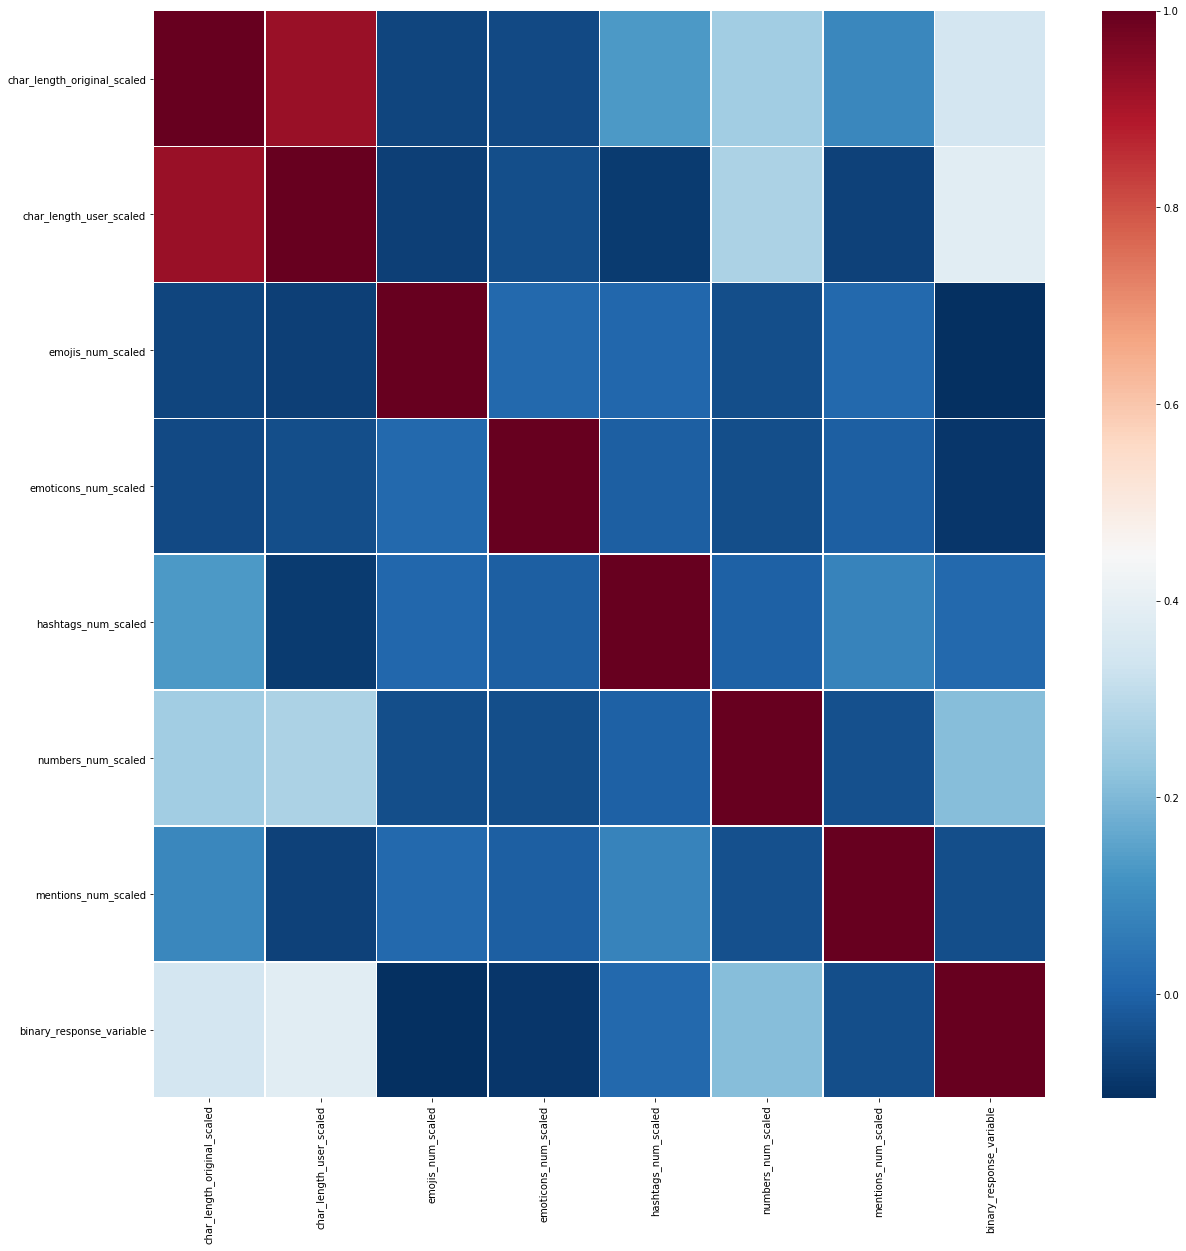

In [9]:
#Using Spearman Correlation, as it is non-parametric
#Spearman correlation works well with binary 

plt.figure(figsize=(20,20))
spearman_corr = feat_eng_col_with_binary_df.corr(method='spearman')
#sns.heatmap(pearson_corr, annot=True, cmap=plt.cm.Reds)
#plt.show()

sns.heatmap(spearman_corr, 
            xticklabels=spearman_corr.columns,
            yticklabels=spearman_corr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [10]:
#Correlation with output variable
cor_target = abs(spearman_corr["binary_response_variable"])
#cor_target
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features_sort_descending = relevant_features.sort_values(ascending=False)

In [11]:
relevant_features_sort_descending = relevant_features_sort_descending.drop(labels=['binary_response_variable'])
relevant_features_sort_descending

char_length_user_scaled        0.382609
char_length_original_scaled    0.345401
numbers_num_scaled             0.213332
emojis_num_scaled              0.105375
emoticons_num_scaled           0.088798
mentions_num_scaled            0.042005
hashtags_num_scaled            0.012245
Name: binary_response_variable, dtype: float64

Big oof, the mean of Spearman correlation coefficients is around 0.16, not very high at all. 

In [12]:
relevant_features_sort_descending.describe()

count    7.000000
mean     0.169967
std      0.147131
min      0.012245
25%      0.065402
50%      0.105375
75%      0.279366
max      0.382609
Name: binary_response_variable, dtype: float64

Let's keep `char_length_user_scaled` 

## Principal Component Analysis

In [27]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

pca_fit_array = X_word_vectors_array

# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(pca_fit_array)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.09137927 0.07464946]
[[-0.24123863 -0.07264596 -0.01203866  0.09004069 -0.04343301 -0.09710278
   0.09230787  0.0862562   0.01488416 -0.11389911  0.13536948 -0.03325297
  -0.02654762 -0.08457257 -0.05152897 -0.04044094  0.18107681  0.01498379
   0.09991744  0.03242587  0.03339836 -0.00401112  0.08209386  0.04539026
   0.02830537 -0.01529528 -0.20483003 -0.01125589 -0.04288896  0.11266239
  -0.06383489 -0.11667522  0.09919937  0.10187002 -0.01742119 -0.24034401
  -0.01184152 -0.19394818  0.01968669  0.04501061 -0.03912201 -0.03410149
   0.02876038  0.08056587 -0.01865697 -0.0378611  -0.08240053  0.13330651
  -0.0668018   0.07857    -0.06353683  0.10327788  0.07063004  0.06031102
   0.1665235   0.0301755   0.02829642 -0.11278156 -0.0359993  -0.00547222
  -0.17888799 -0.10456794 -0.07362218  0.05532997 -0.02675549  0.08634031
   0.09834974 -0.06374532  0.02934266  0.02053756 -0.04523428 -0.08108571
   0.05475273  0.02107468 -0.02530682 -0.26544509  0.07129071  0.177

In [28]:
principalComponents = pca.fit_transform(pca_fit_array)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['binary_response_variable']]], axis = 1)

In [32]:
principalComponents

array([[ 0.76662188, -0.20654339],
       [-0.4430133 , -0.13744648],
       [-0.81416971, -1.50625428],
       ...,
       [-3.55946384,  1.7246604 ],
       [ 0.22775984, -0.35078448],
       [ 1.75868882,  1.03726677]])

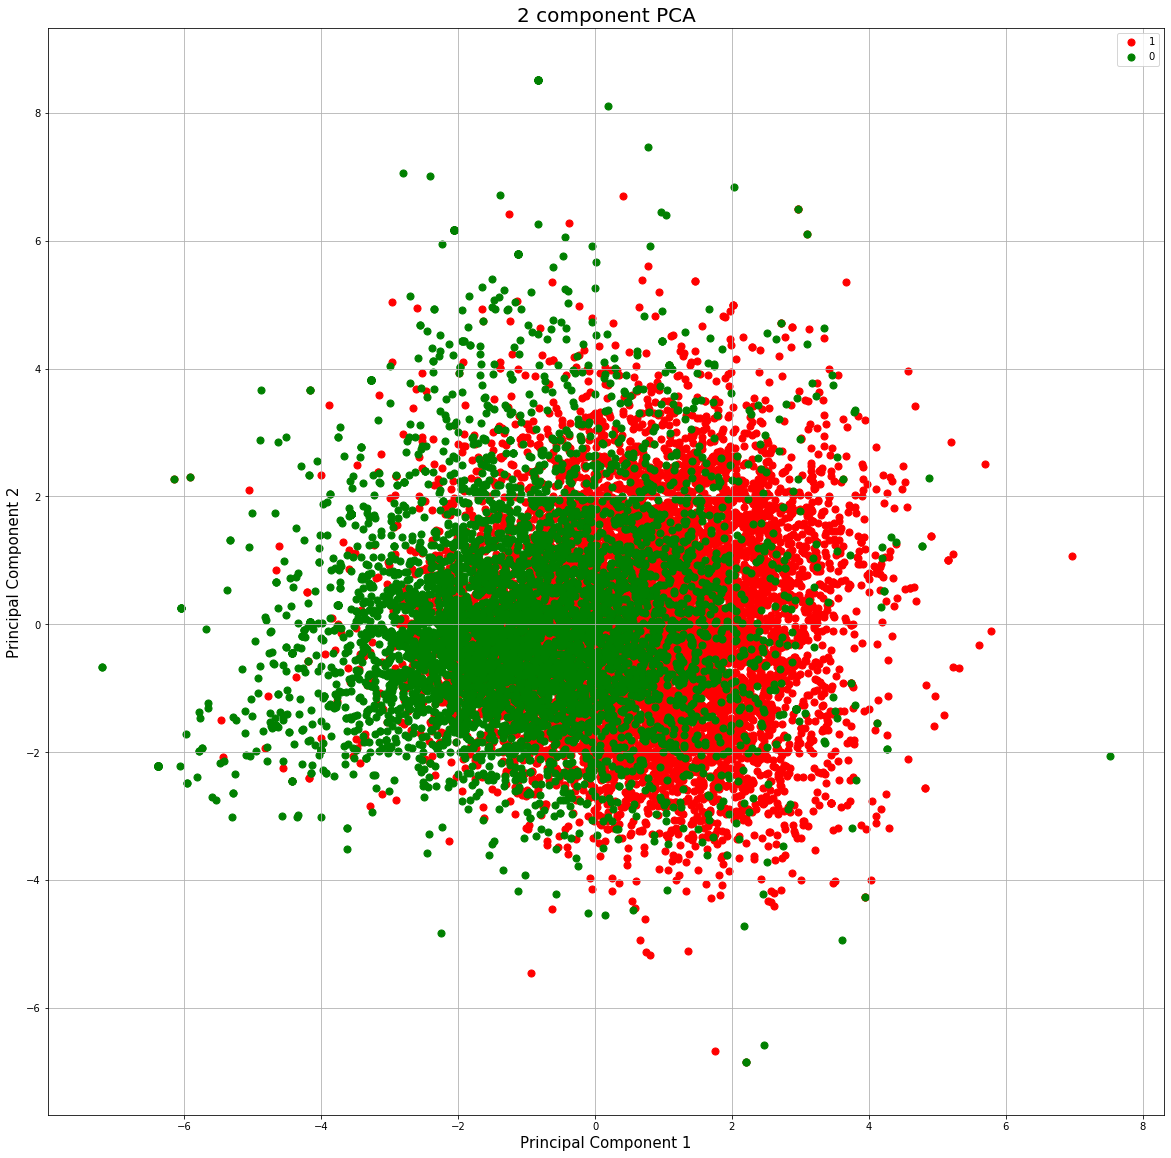

In [29]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['binary_response_variable'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, features_num)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

## RFE

In [36]:
# feature extraction
logmodel = LogisticRegression(solver='lbfgs', random_state=1)
rfe = RFE(model, features_num)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
  True False False False  True False  True False False False False False
  True False False False False False]
Feature Ranking: [105  95  56   6  44  71  91  27  68  16   5   3  73  41  54  88  28  50
  61  38 102  17  99  21  63  29  40  19  35   1  64  26   1   1  42  92
  45  46   1  85  93  97 100  62  18   2  55  25  77  86  60  87  20  48
  81  32 103  37  57  65  82  69 

In [37]:
logmodel.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
predictions = logmodel.predict(X)

from sklearn.metrics import classification_report
print(classification_report(Y,predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      5462
         1.0       0.81      0.88      0.84      9178

   micro avg       0.79      0.79      0.79     14640
   macro avg       0.79      0.77      0.77     14640
weighted avg       0.79      0.79      0.79     14640

